In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import stats
from math import gamma

# 2.3.1 ベータ分布

In [3]:
def CB(a, b):
    return gamma(a + b) / (gamma(a) * gamma(b))

In [8]:
a = [0.5, 0.6, 1.0, 10.0, 10.0]
b = [0.5, 0.8, 1.0, 40.0, 5.0]
TRIAL_NUMBERS = 5

In [5]:
def Beta(mu, a, b):
    return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))

In [6]:
mu = np.linspace(0, 1, 100)


/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))


/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))
/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))


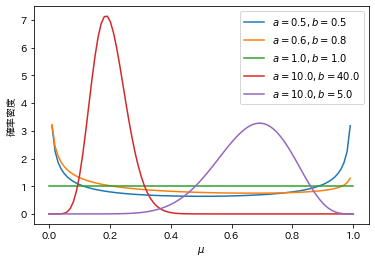

In [15]:
fig, ax = plt.subplots()
y = []
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] # 色
l = ['$a=0.5, b=0.5$', '$a=0.6, b=0.8$', '$a=1.0, b=1.0$', '$a=10.0, b=40.0$', '$a=10.0, b=5.0$']
for i in range(TRIAL_NUMBERS):
    y = Beta(mu, a[i], b[i])
    ax.plot(mu, y, color=c[i], label=l[i])
ax.set_xlabel('$\mu$')
ax.set_ylabel('確率密度')
ax.legend()


# 2.3.2 ディリクレ分布

In [27]:
def CD(alpha):
    K = len(alpha)
    denominator = 1
    sum_alpha = 0
    for k in range(K):
        denominator *= gamma(alpha[k])
        sum_alpha += alpha[k]
    molecule = gamma(sum_alpha)
    return molecule / denominator

In [28]:
def Dir3D(pi, alpha):
    prod = 1
    for k in range(len(pi)):
        prod *= pi[k] ** (alpha[k] - 1)
    return CD(alpha) * prod

In [52]:
pi1 = np.linspace(0, 1, 100)
pi2 = np.linspace(0, 1, 100)
PI1, PI2 = np.meshgrid(pi1, pi2)
PI1[PI1 + PI2 > 1] = 0
PI2[PI1 + PI2 > 1] = 0
    

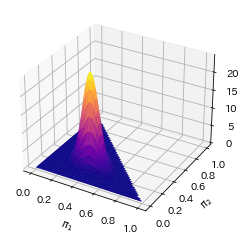

In [189]:
alpha = [10.0, 10.0, 10.0]
pi3 = []
for pi1_, pi2_ , pi3_ in zip(PI1.flatten(), PI2.flatten(),  (1 - PI1 - PI2).flatten()):
    pi3_ = 1 - pi1_ - pi2_
    pi3.append(Dir3D([pi1_, pi2_, pi3_], alpha))

PI3 = np.array(pi3).reshape(PI1.shape)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(PI1, PI2, PI3,cmap='plasma')
ax3d.set_xlabel("$\pi_1$")
ax3d.set_ylabel("$\pi_2$")
plt.show()

/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/155359335.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  prod *= pi[k] ** (alpha[k] - 1)
/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/155359335.py:4: RuntimeWarning: invalid value encountered in double_scalars
  prod *= pi[k] ** (alpha[k] - 1)
/Users/koki_ccilab/miniforge3/envs/myPy/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


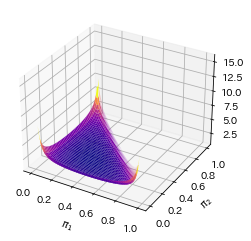

In [190]:
alpha = [0.5, 0.5, 0.5]
pi3 = []
for pi1_, pi2_ , pi3_ in zip(PI1.flatten(), PI2.flatten(),  (1 - PI1 - PI2).flatten()):
    pi3_ = 1 - pi1_ - pi2_
    pi3.append(Dir3D([pi1_, pi2_, pi3_], alpha))

PI3 = np.array(pi3).reshape(PI1.shape)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(PI1, PI2, PI3,cmap='plasma')
ax3d.set_xlabel("$\pi_1$")
ax3d.set_ylabel("$\pi_2$")
plt.show()

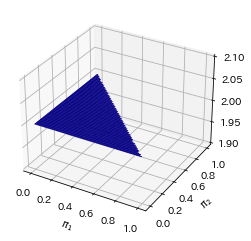

In [191]:
alpha = [1.0, 1.0, 1.0]
pi3 = []
for pi1_, pi2_ , pi3_ in zip(PI1.flatten(), PI2.flatten(),  (1 - PI1 - PI2).flatten()):
    pi3_ = 1 - pi1_ - pi2_
    pi3.append(Dir3D([pi1_, pi2_, pi3_], alpha))

PI3 = np.array(pi3).reshape(PI1.shape)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(PI1, PI2, PI3,cmap='plasma')
ax3d.set_xlabel("$\pi_1$")
ax3d.set_ylabel("$\pi_2$")
plt.show()

# 2.3.3 ガンマ分布

In [61]:
def CG(a, b):
    return (b ** a) / gamma(a)

In [66]:
def Gam(lmd, a, b):
    return CG(a, b) * lmd ** (a - 1) * np.exp(-b*lmd)

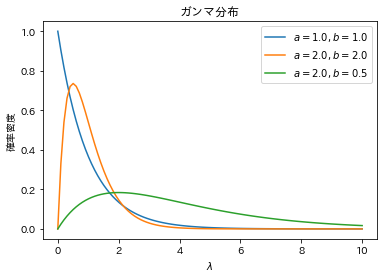

In [85]:
fig, ax = plt.subplots()
lmd = np.linspace(0, 10, 100)
a = [1.0, 2.0, 2.0]
b = [1.0, 2.0, 0.5]
l = ['$a=1.0, b=1.0$', '$a=2.0, b=2.0$', '$a=2.0, b=0.5$']

for i in range(3):
    y = Gam(lmd, a[i], b[i])
    ax.plot(lmd, y, color=c[i], label=l[i])
ax.set_xlabel('$\lambda$')
ax.set_ylabel('確率密度')
ax.set_title('ガンマ分布')
ax.legend()

# 2.3.4 1次元ガウス分布

In [110]:
def N(x, mu, sigma2):
    return np.exp(-(x - mu)**2 / (2 * sigma2)) / np.sqrt(2 * np.pi * sigma2)

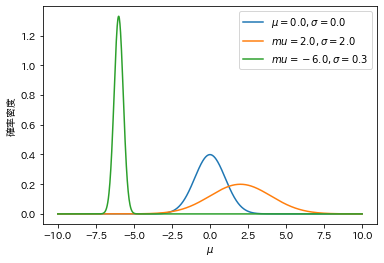

In [112]:
fig, ax = plt.subplots()
x = np.linspace(-10, 10, 1000)
mu = [0.0, 2.0, -6.0]
sigma = [1.0, 2.0, 0.3]
l = ['$\mu=0.0, \sigma=0.0$', '$mu=2.0, \sigma=2.0$', '$mu=-6.0, \sigma=0.3$']

for i in range(3):
    y = N(x, mu[i], sigma[i]**2)
    ax.plot(x, y, color=c[i], label=l[i])
ax.set_xlabel('$\mu$')
ax.set_ylabel('確率密度')
ax.legend()

In [81]:
def H_N(mu, sigma2):
    return 0.5 * (1 + np.log(sigma2) + np.log(2 * np.pi))

In [82]:
H_N(0, 1.0)

1.4189385332046727

In [155]:
class Norm():
    def __init__(self, mu, sigma2):
        self.mu = mu
        self.sigma2 = sigma2
        self.x = np.linspace(-10.0, 10.0, 1000)
        self.y = np.exp(- (self.x - self.mu) ** 2 / (2 * self.sigma2)) / np.sqrt(2 * np.pi * self.sigma2)

    def entropy(self):
        return 0.5 * (1 + np.log(self.sigma2) + np.log(2 * np.pi))

In [115]:
mu = [0.0, 0.0, 0.0]
mu_hat = [0.5, 0.0, 2.0]
sigma2 = [1.0, 2.0, 2.0]
sigma2_hat = [1.0, 1.0, 1.0]


In [127]:
N1 = Norm(mu[0], sigma2[0])
N1.entropy()

1.4189385332046727

In [130]:
def KL(p, q):
    return 0.5 * (((p.mu - q.mu) ** 2 + q.sigma2 ** 2) / p.sigma2 + np.log(p.sigma2 / q.sigma2) - 1)

In [131]:
N2 = Norm(mu_hat[0], sigma2_hat[0])
KL(N1, N2)

0.125

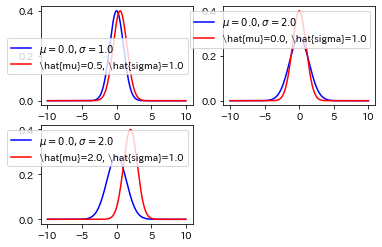

In [167]:
fig = plt.figure()
ax = []
l = [['$\mu=0.0, \sigma=1.0$', '\hat{mu}=0.5, \hat{sigma}=1.0'],
    ['$\mu=0.0, \sigma=2.0$', '\hat{mu}=0.0, \hat{sigma}=1.0'],
    ['$\mu=0.0, \sigma=2.0$', '\hat{mu}=2.0, \hat{sigma}=1.0']]
for i in range(3):
    ax.append(fig.add_subplot(2, 2, i + 1))
    p = Norm(mu[i], sigma2[i])
    q = Norm(mu_hat[i], sigma2_hat[i])
    klpq = KL(p, q)
    klqp = KL(q, p)
    ax[i].plot(p.x, p.y, color='b', label=l[i][0])
    ax[i].plot(q.x, q.y, color='r', label=l[i][1])
    ax[i].legend()
    

$KL(q||p)=$0.125
$KL(p||q)=$0.125
$KL(q||p)=$1.1534264097200273
$KL(p||q)=$1.1534264097200273
$KL(q||p)=$3.1534264097200273
$KL(p||q)=$3.1534264097200273


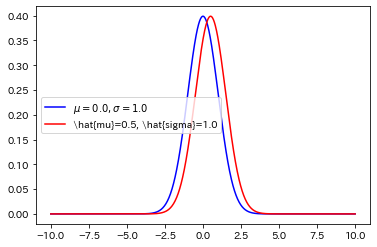

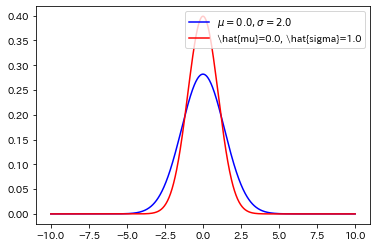

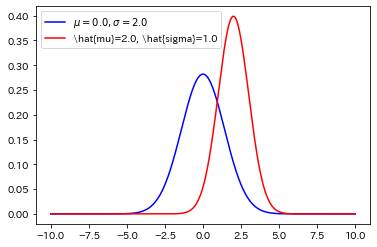

In [170]:
l = [['$\mu=0.0, \sigma=1.0$', '\hat{mu}=0.5, \hat{sigma}=1.0'],
    ['$\mu=0.0, \sigma=2.0$', '\hat{mu}=0.0, \hat{sigma}=1.0'],
    ['$\mu=0.0, \sigma=2.0$', '\hat{mu}=2.0, \hat{sigma}=1.0']]
for i in range(3):
    fig, ax = plt.subplots()
    p = Norm(mu[i], sigma2[i])
    q = Norm(mu_hat[i], sigma2_hat[i])
    klpq = KL(p, q)
    klqp = KL(q, p)
    ax.plot(p.x, p.y, color='b', label=l[i][0])
    ax.plot(q.x, q.y, color='r', label=l[i][1])
    ax.legend()
    print('$KL(q||p)=$'+str(klqp))
    print('$KL(p||q)=$'+str(klqp))

# 2.3.5 多次元ガウス分布

In [182]:
x1 = np.linspace(-4, 4, 1000)
x2 = np.linspace(-4, 4, 1000)
X1, X2 = np.meshgrid(x1, x2)

In [183]:
def N2D(x1, x2, mu, Sigma):
    X = (np.array([x1, x2]) - mu[:, None, None]).transpose(1, 2, 0)
    inv = np.linalg.inv(Sigma)[None, None, :, :]
    det = np.linalg.det(Sigma)
    return np.exp(-0.5 * X[:, :, None, :] @ inv @ X[:, :, :, None]) / np.sqrt((2 * np.pi)**2 * det) 

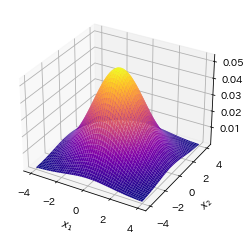

In [194]:
mu = np.array([0., 0.])
Sigma = np.array([[3., 0.], [0., 3.]])
P = N2D(X1, X2, mu, Sigma)[:, :, 0, 0]

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X1, X2, P,cmap='plasma')
ax3d.set_xlabel("$x_1$")
ax3d.set_ylabel("$x_2$")
plt.show()

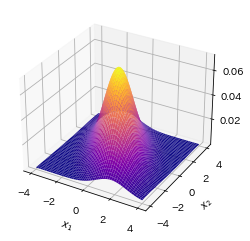

In [195]:
mu = np.array([0., 0.])
Sigma = np.array([[2., -1 * np.sqrt(3)], [-1 * np.sqrt(3), 4.]])
P = N2D(X1, X2, mu, Sigma)[:, :, 0, 0]

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X1, X2, P,cmap='plasma')
ax3d.set_xlabel("$x_1$")
ax3d.set_ylabel("$x_2$")
plt.show()

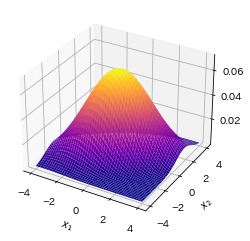

In [196]:
mu = np.array([0., 0.])
Sigma = np.array([[4.0, np.sqrt(3)], [np.sqrt(3), 2.]])
P = N2D(X1, X2, mu, Sigma)[:, :, 0, 0]

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X1, X2, P,cmap='plasma')
ax3d.set_xlabel("$x_1$")
ax3d.set_ylabel("$x_2$")
plt.show()